## Lecture Housekeeping:

- The use of disrespectful language is prohibited in the questions, this is a supportive, learning environment for all - please engage accordingly.
    - Please review Code of Conduct (in Student Undertaking Agreement) if unsure
- No question is daft or silly - ask them!
- There are Q&A sessions midway and at the end of the session, should you wish to ask any follow-up questions.
- Should you have any questions after the lecture, please schedule a mentor session.
- For all non-academic questions, please submit a query: [www.hyperiondev.com/support](www.hyperiondev.com/support)

## Machine Learning

#### Learning objectives

   - Overview of Simple and Multiple Linear Regression
   - Demo of model training
   - Discuss model Performance Metrics in Machine Learning

## Simple vs Multiple Regression

Multiple Regression is a step beyond simple regression. The main difference between simple and multiple regression is that multiple regression includes two or more independent variables – sometimes called predictor variables – in the model, rather than just one.

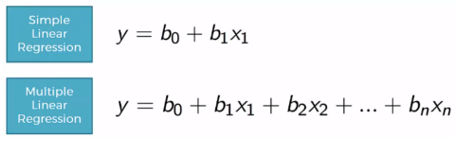

## Training and Testing models

We have the advertising dataset that captures the sales revenue generated with respect to advertisement costs across multiple channels namely radio, tv, and newspapers. We will train two models on this dataset, SLR and MLR, and observe how they perform on our testing data to see which one performs better.

### Simple Linear Regression

We start with the SLR case. We will use TV advertising costs as our predictor variable.

In [1]:
# Importing the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Advertising.csv')

# Create independent variable
X = df[['TV']].values
# Create dependent variable
y = df['Sales'].values

# Split the data into training (80%) and testing (20%) data subsets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [3]:
# Fit the model on the training subset
reg = LinearRegression()
model = reg.fit(Xtrain, ytrain)

In [4]:
# Use the linear regression model to make predictions on the test data
y_pred = reg.predict(Xtest)

We now need a measure of how well our model performed on our test data. We will use R-squared (the Coefficient of Determination), which is the proportion of variation in our dependent variable explained by our independent variable. The more variation our predictors can explain, the better our predictions can be. So a better model will have a higher R-squared.

In [7]:
# Calculate R-squared
R_sq = r2_score(ytest, y_pred)
print("R-squared is ", round(R_sq*100), "%")

R-squared is  68 %


### Multiple Linear Regression

Now we will include all the other predictors in our model. That is TV, Radio, and Newspaper will be our independent variables, making this a Multiple Regression case.

In [9]:
# Create three independent variables
X = df[['TV', 'Radio', 'Newspaper']].values
# Create dependent variable
y = df['Sales'].values

# Split the data into training and testing data subsets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
# Fit the model
reg = LinearRegression()
model = reg.fit(Xtrain, ytrain)

In [11]:
# Fit the multiple linear regression model to make predictions 
y_pred = reg.predict(Xtest)

In [13]:
# Calculate R-squared
R_sq = r2_score(ytest, y_pred)
print("R-squared is ", round(R_sq*100), "%")

R-squared is  86 %


The SLR model had an R-squared of 68% and our MLR model had an R-squared of 86%. The latter model is better, based on this metric.

## Notes

R-squared tends to increase as more predictors are added to the model, even if those predictors are not truly improving the model's performance. This is because R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables, and adding more predictors increases the chance of finding a relationship by random chance.

### Solution:
We can use the adjusted R-squared which adjusts the R-squared value by penalizing the addition of unnecessary predictors. Basically, if the additional independent variables do not really improve the model's predictive power significantly, R-squared will not go up so much.

Another solution is to not only rely on R-squared. There are several other metrics you can use - the model that performs the best in all/most of them is the best one you have. 


### Do we always use the same performance metrics in Machine Learning?

No, in machine learning, the choice of evaluation metric depends on the type of problem you are trying to solve. R-squared is great for simple & multiple regression models, but you would not use it to evaluate classification models such as a logistic regression. 

## Resource

This blog goes over performance metrics in Machine Learning - how they are calculated along with code snippets of how you can calculate them yourself: 

https://neptune.ai/blog/performance-metrics-in-machine-learning-complete-guide

## Application

Fit the SLR and MLR models on the advertising dataset. Explore and interpret other perfomance metrics to compare the two.
